# Video Temporal Localisation Scorer

VideoTemporalLocalisationScoring.py

## Description

This script performs scoring for the Video Temporal Localisation task. The script produces three output files, 'scores_probes.csv', which reports scores at the trial (probe) level, 'scores.csv', which aggregates the average metric over subset of trial selection and "query_table_join.csv", which give the mapping between a subset id and its description (query).

The script reports the Matthews correlation coefficient:

\begin{equation*}
MCC = \frac{TP \times TN - FP \times FN}{\sqrt{ \left( TP + FP \right)\left( TP + FN \right)\left( TN + FP \right)\left( TN + FN \right)}}
\end{equation*}

## Setup

### Python environnement

The scoring script has been developed and tested in Python 2.7 and Python 3 (version 3.3+). Here, we provide an example of a requirements file for conda (https://conda.io/miniconda.html)

*requirements.txt*

In [1]:
"""
name: myenv
dependencies:
  - python=3.6
  - numpy
  - pandas
  - matplotlib
"""

'\nname: myenv\ndependencies:\n  - python=3.6\n  - numpy\n  - pandas\n  - matplotlib\n'

Run the following commands (based on the previous requirements file example)

> conda env create -f requirements.txt
> source activate myenv

## Command-line interface

### Required arguments

-r, --path_ref PATH_REF
- path to the manipulation video reference csv file

-i, --path_index PATH_INDEX
- path to the manipulation video index csv file

-j, --path_journalmask PATH_JOURNALMASK
- path to the manipulation video ref journal mask csv file

-p, --path_probejournaljoin PATH_PROBEJOURNALJOIN
- path to the manipulation video ref probe journal join csv file

-s, --path_sysout PATH_SYSOUT
- path to the system output file


### Optional arguments

-c, --collars COLLARS
- collar value (int) to add to each side of the reference intervals

-q, --query QUERY [QUERY ...]
- give a sequence of criteria over the probe selection. Each query should be between double quotes. "*" select all of them

-o, --output_path OUTPUT
- path to the folder where the scores will be dumped. By default, it create a 'score_output' folder in the current directory

-d, --dump_dataframe DUMP_DATAFRAME
- dump the scores_probes dataframe as a pickle object in the output_path folder

-l, --log
- Generate a log file in the current directory describing the scoring process

### Example Usage

In [2]:
%%bash
python VideoTemporalLocalizationScoring.py \
-o "./scores_output_folder" \
-r "../../data/test_suite/videoTemporalLocalizationScorerTests/test_case_1_videotemploc-ref.csv" \
-i "../../data/test_suite/videoTemporalLocalizationScorerTests/test_case_1_videotemploc-index.csv" \
-j "../../data/test_suite/videoTemporalLocalizationScorerTests/test_case_1_videotemploc-ref-journalmask.csv" \
-p "../../data/test_suite/videoTemporalLocalizationScorerTests/test_case_1_videotemploc-ref-probejournaljoin.csv" \
-s "../../data/test_suite/videoTemporalLocalizationScorerTests/test_case_1_system_output.csv" \
-c 5 \
--query "*" "Operation == 'PasteFrames'" \
-d \
-l

Done.


In [3]:
%%bash
head ./scores_output_folder/scores_probes.csv \
     ./scores_output_folder/scores.csv \
     ./scores_output_folder/query_table_join.csv

==> ./scores_output_folder/scores_probes.csv <==
query|ProbeFileID|MCC
0|242abec7860e7398972896ab2870d92a|0.0
0|2582c55863a6fccff1f2c1d18be3ece0|0.547007017098
0|51c5b227194cde6af514c49f0fd1b823|0.689585635082
0|7c29d2c8f4ff99dc12f1d38a62f82e8b|0.0
0|80fe38b1d96e7cdce250206f779c3c85|0.172041301808
0|a6dbfc1791ff289f171fcd18eef6a1a4|1.0
0|c1359ef687670baa5de7f4aea7baa479|1.0
0|c428154bfb6c8fb830ce8fd8dc66fbc4|-0.125234045924
0|dabab325af0298021cfdb8168b1455ff|0.178655002755

==> ./scores_output_folder/scores.csv <==
query|MCC
0|0.384672767869
1|0.603811913734

==> ./scores_output_folder/query_table_join.csv <==
id|query
0|*
1|Operation == 'PasteFrames'


In [4]:
import pandas as pd
pd.read_pickle("./scores_output_folder/df_scores_probes.pkl")

MCC
query ProbeFileID                               
0     242abec7860e7398972896ab2870d92a  0.000000
      2582c55863a6fccff1f2c1d18be3ece0  0.547007
      51c5b227194cde6af514c49f0fd1b823  0.689586
      7c29d2c8f4ff99dc12f1d38a62f82e8b  0.000000
      80fe38b1d96e7cdce250206f779c3c85  0.172041
      a6dbfc1791ff289f171fcd18eef6a1a4  1.000000
      c1359ef687670baa5de7f4aea7baa479  1.000000
      c428154bfb6c8fb830ce8fd8dc66fbc4 -0.125234
      dabab325af0298021cfdb8168b1455ff  0.178655
1     2582c55863a6fccff1f2c1d18be3ece0  0.547007
      51c5b227194cde6af514c49f0fd1b823  0.689586
      a6dbfc1791ff289f171fcd18eef6a1a4  1.000000
      dabab325af0298021cfdb8168b1455ff  0.178655

## Computation illustration

### Imports

In [5]:
import numpy as np
from intervalcompute import IntervalCompute as IC
from TemporalVideoScoring import VideoScoring

### Inputs

In [6]:
collar = 1
global_interval = [0,25]
ref_intervals = IC.compute_intervals_union([np.array([[10,18]])])
sys_intervals = IC.compute_intervals_union([np.array([[5,12], [17, 20]])])
collars_intervals = IC.compute_collars(ref_intervals, collar, crop_to_range = global_interval)
SNS = np.array([[4,7], [13,15]])
print("Ref : {}".format(ref_intervals.tolist()))
print("Sys : {}".format(sys_intervals.tolist()))
print("Collars : {}".format(collars_intervals.tolist()))
print("SNS : {}".format(SNS.tolist()))

Ref : [[10, 18]]
Sys : [[5, 12], [17, 20]]
Collars : [[9, 11], [17, 19]]
SNS : [[4, 7], [13, 15]]


### Computation

In [7]:
Scorer = VideoScoring()
confusion_vector, all_intervals, all_interval_in_seq_array = Scorer.compute_confusion_map(ref_intervals, 
                                                                                   sys_intervals, 
                                                                                   global_interval, 
                                                                                   collars=collars_intervals,
                                                                                   SNS=SNS)

In [8]:
confusion_vector

array([ 0, -2,  2, -1,  3,  1, -2,  1, -1,  2,  0])

### Display

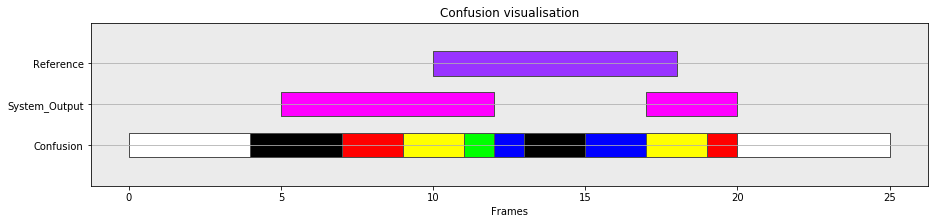

In [9]:
figure_width = 15
IC.display_confusion_scoring(IC.compute_intervals_union([ref_intervals]),
                              IC.compute_intervals_union([sys_intervals]), 
                              global_interval, 
                              confusion_results = [confusion_vector, all_intervals, Scorer.confusion_mapping], 
                              figsize=(figure_width,int(figure_width/4)),
                              colors_def = ["#9933FF","#FF00FF"])

In [10]:
red = "#FF0000"
green = "#80FF00"
blue = "#0000FF"
yellow = "#FFFF00"
white = "#FFFFFF"
black = "#000000"
bokeh_confusion_mapping = {0 : ["TN", white], 
                          1 : ["FN", blue], 
                          2 : ["FP", red], 
                          3 : ["TP", green], 
                         -1 : ["X", yellow],
                         -2 : ["Y", black]}

In [11]:
IC.display_confusion_bokeh(IC.compute_intervals_union([ref_intervals]),
                           IC.compute_intervals_union([sys_intervals]), 
                           global_interval, 
                           confusion_data = [all_intervals, confusion_vector, bokeh_confusion_mapping],
                           plot_size = [900,250])

Loading BokehJS ...

## Disclaimer

This software was developed at the National Institute of Standards and Technology (NIST) by employees of the Federal Government in the course of their official duties. Pursuant to Title 17 Section 105 of the United States Code, this software is not subject to copyright protection and is in the public domain. NIST assumes no responsibility whatsoever for use by other parties of its source code or open source server, and makes no guarantees, expressed or implied, about its quality, reliability, or any other characteristic.